In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cairocffi as cairo
import io
from scipy.ndimage import imread
from scipy.misc import imresize
import json
import gzip
import tarfile
import random
from hangul_utils import check_syllable, split_syllable_char, split_syllables, join_jamos_char
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'
plt.rcParams["font.family"] = "NanumGothic"

print("packs loaded")

packs loaded


In [2]:
import chrecog
chrecog.load_ckpt("data/only_valid_160930.ckpt")

ckpt loaded


In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Not RGB!")
        return rgb

def write_line(text, font):
    WIDTH, HEIGHT = 540, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png (fb)
    mat = imread(fb)
    fb.close()
    return rgb2gray(mat)

def analyze_ch(input_mat):
    pred = chrecog.get_pred_one(imresize(input_mat, [32, 32]))
    return chrecog.get_candidate(pred)
    
def build_pred_chart(text, font="NanumGothic"):
    mat = write_line(text, font)

    plt.figure(figsize=(12,12))
    plt.yticks(())
    plt.imshow(mat)

    for i in range(0, 440):
        if i % 3 == 0:
            plt.annotate(analyze_ch(mat[:50, i:50+i]), xy=(i+22, (i%24)*2+50))
            
    plt.figure()
    for i in range(9):
        plt.subplot(1,9,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(mat[:50, i*50:50+i*50])

print("function loaded")

function loaded


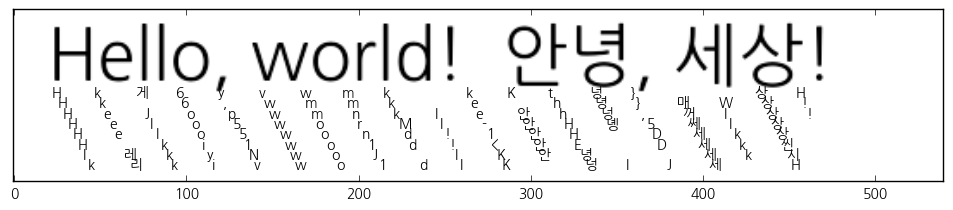

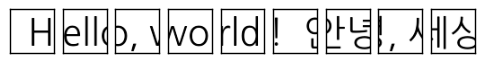

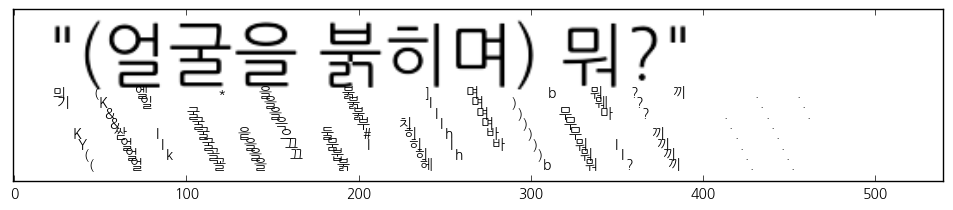

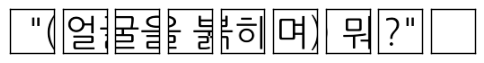

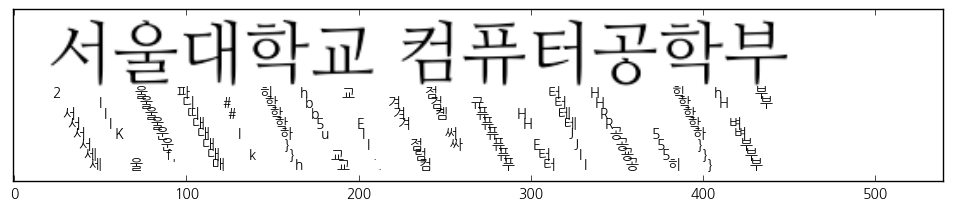

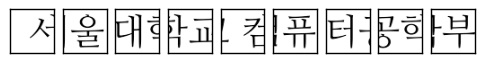

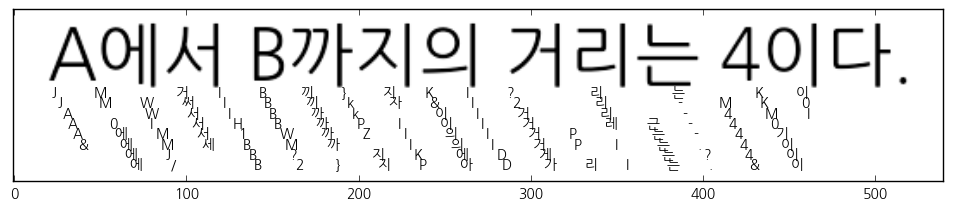

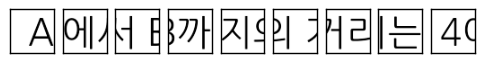

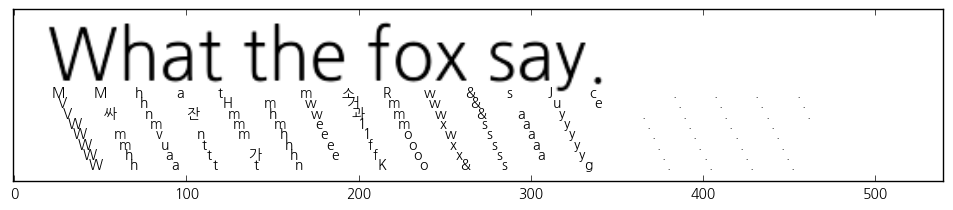

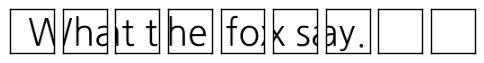

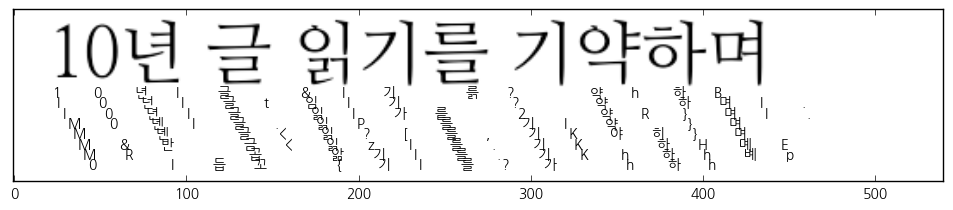

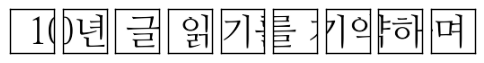

In [4]:
build_pred_chart("Hello, world!  안녕, 세상!")
build_pred_chart("\"(얼굴을 붉히며) 뭐?\"")
build_pred_chart("서울대학교 컴퓨터공학부", "NanumMyeongjo")
build_pred_chart("A에서 B까지의 거리는 4이다.")
build_pred_chart("What the fox say.")
build_pred_chart("10년 글 읽기를 기약하며", "NanumMyeongjo")